# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

In [1]:
##Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Données
coords_path = '/Users/qdouzery/Desktop/INSAT_Defi-IA-2022/Data/Other/stations_coordinates.csv' #Perso
#coords_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Other/stations_coordinates.csv' #INSA
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

xtrainS_path = '/Users/qdouzery/Desktop/INSAT_Defi-IA-2022/Data/Train/X_station_train.csv' #Perso
#xtrainS_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Train/X_station_train.csv' #INSA
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

ytrain_path = '/Users/qdouzery/Desktop/INSAT_Defi-IA-2022/Data/Train/Y_train.csv' #Perso
#ytrain_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Train/Y_train.csv' #INSA
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

## <font color = 'royalblue'>2 Présentation</font>

### Metadata parameters

* **number_sta** : ground station number

The date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.

### Meteorological parameters

* **dd** : wind direction in degrees

* **ff** : wind speed in m.s<sup>-1</sup>

* **precip** : precipitation during the reporting period in kg.m<sup>2</sup>

* **hu** : humidity in %

* **td** : dew point temperature** in Kelvin

* **t** : temperature in Kelvin

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

## <font color = 'royalblue'>3 Récupération des données</font>

In [3]:
##Open the file with station coordinates (latitude/longitude)
coords = pd.read_csv(coords_path)
coords['number_sta'] = coords['number_sta'].astype('category')  
display(coords.head())
print('Missing Data :', coords.isna().sum().sum(), '\n', 'Shape is :', coords.shape)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0


Missing Data : 0 
 Shape is : (325, 4)


In [4]:
##Open the file with station meteorological parameters
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4


Missing Data : 6899007 
 Shape is : (4409474, 9)


In [5]:
#Open the file with station ground thruth
param = 'Ground_truth'  #weather parameter name in the file ('Ground_truth' about Y and 'Prediction' about baseline)
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0


Missing Data : 21640 
 Shape is : (183747, 4)


## <font color = 'royalblue'>4 Préparation des données</font>

In [26]:
xtrainS2 = xtrainS.copy()
xtrainS2.dropna(inplace=True)
print('Missing Data : ',xtrainS2.isna().sum().sum(), '  Shape is : ', xtrainS2.shape)

Missing Data :  0   Shape is :  (2264105, 9)


In [27]:
ytrain2 = ytrain.copy()
ytrain2.dropna(inplace=True)
print('Missing Data : ',ytrain2.isna().sum().sum(), '  Shape is : ', ytrain2.shape)

Missing Data :  0   Shape is :  (162107, 4)


## <font color = 'royalblue'>5 Exploration statistique</font>

## 5.1 Histogrammes

In [28]:
Variables = {"ff":"Wind speed (m/s)", "dd":"Wind direction (°)",
             "precip":"Precipitation during the reporting period (km.m^2)", "hu":"Humidity (%)",
             "td":"Dew point temperature (K)", "t":"Temperature (K)"}

Aux_Var = {0:"ff", 1:"dd", 2:"precip", 3:"hu", 4:"td", 5:"t"}

Describe_Var = {}

**Données brutes**

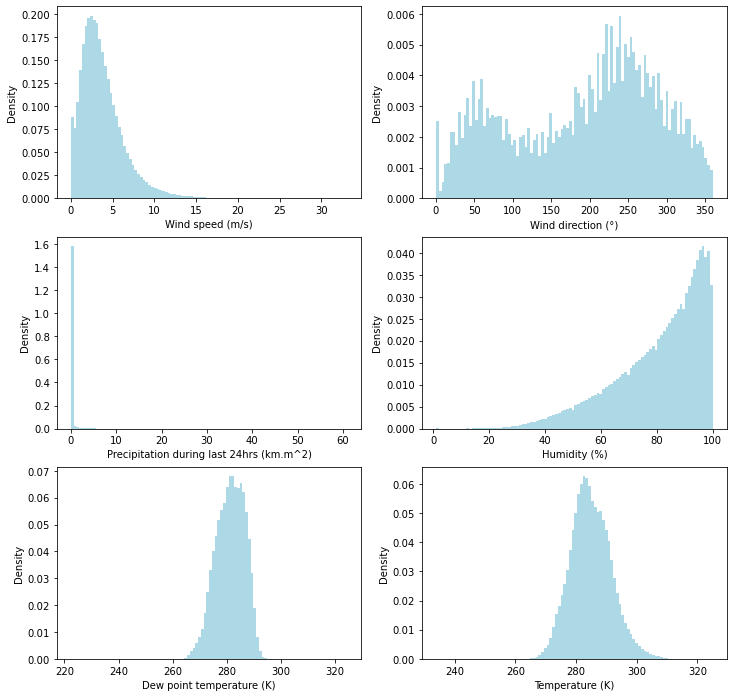

In [29]:
fig, axs = plt.subplots(3,2)
fig.set_figheight(12)
fig.set_figwidth(12)

c = 0
for i in range(3):
    for j in range(2):
        axs[i,j].hist(xtrainS[Aux_Var[c]], bins=100, density=True, color='lightblue')
        axs[i,j].set(xlabel=Variables[Aux_Var[c]], ylabel='Density')
        c+=1

**Données nettoyées**

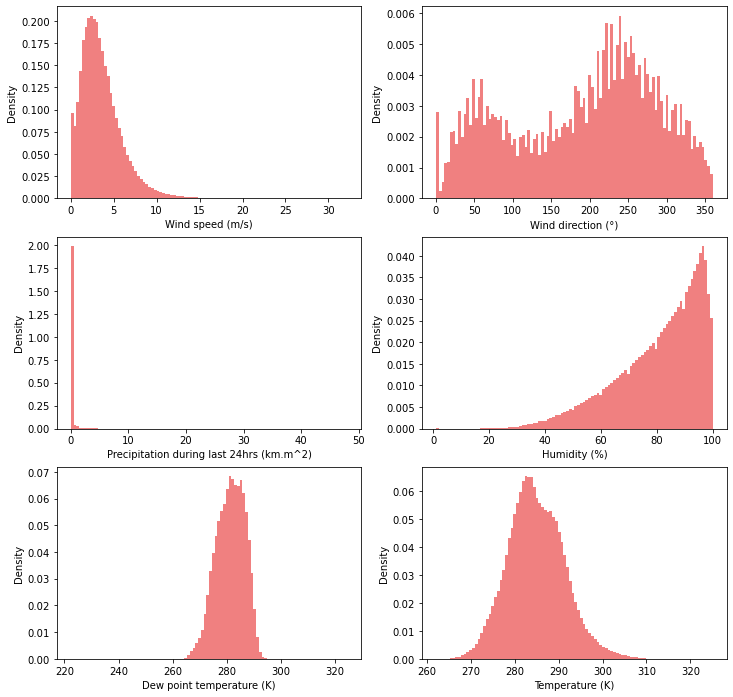

In [30]:
fig, axs = plt.subplots(3,2)
fig.set_figheight(12)
fig.set_figwidth(12)

c = 0
for i in range(3):
    for j in range(2):
        axs[i,j].hist(xtrainS2[Aux_Var[c]], bins=100, density=True, color='lightcoral')
        axs[i,j].set(xlabel=Variables[Aux_Var[c]], ylabel='Density')
        c+=1

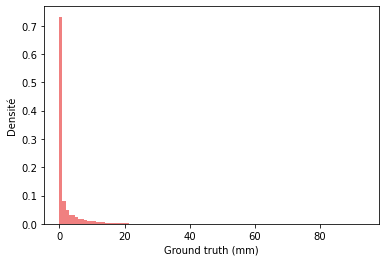

In [31]:
plt.hist(ytrain[param], bins=100, density=True, color='lightcoral')
plt.xlabel("Ground truth (mm)")
plt.ylabel("Densité")
plt.show()

## 5.2 Boxplots

**Données nettoyées**

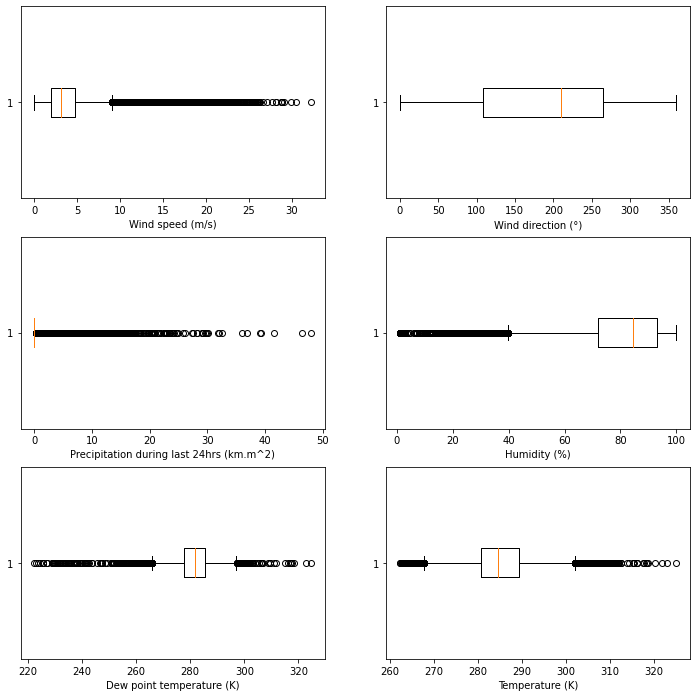

In [32]:
fig, axs = plt.subplots(3,2)
fig.set_figheight(12)
fig.set_figwidth(12)

c = 0
for i in range(3):
    for j in range(2):
        axs[i,j].boxplot(xtrainS2[Aux_Var[c]], vert=False)
        axs[i,j].set(xlabel=Variables[Aux_Var[c]])
        c+=1

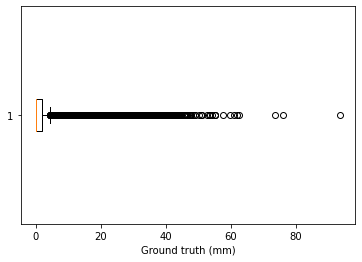

In [33]:
plt.boxplot(ytrain2[param], vert=False)
plt.xlabel("Ground truth (mm)")
plt.show()

## 5.3 Données chiffrées

In [34]:
for key in Variables:
    Describe_Var[key] = xtrainS2[key].describe()
Describe_xtrainS2 = pd.DataFrame(Describe_Var)
Describe_xtrainS2

,ff,dd,precip,hu,td,t
count,2.264105e+06,2.264105e+06,2.264105e+06,2.264105e+06,2.264105e+06,2.264105e+06
mean,3.562683e+00,1.909744e+02,8.196117e-02,8.085707e+01,2.813762e+02,2.849216e+02
std,2.378883e+00,9.456719e+01,4.505564e-01,1.509475e+01,5.243936e+00,6.399077e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.223500e+02,2.621300e+02
25%,1.890000e+00,1.090000e+02,0.000000e+00,7.180000e+01,2.776200e+02,2.805600e+02
50%,3.120000e+00,2.100000e+02,0.000000e+00,8.460000e+01,2.816900e+02,2.845500e+02
75%,4.730000e+00,2.640000e+02,0.000000e+00,9.310000e+01,2.854800e+02,2.891700e+02
max,3.222000e+01,3.600000e+02,4.800000e+01,1.000000e+02,3.246700e+02,3.250700e+02


In [35]:
ytrain2[param].describe()

count    162107.000000
mean          1.948453
std           4.190966
min           0.000000
25%           0.000000
50%           0.200000
75%           1.800000
max          93.500000
Name: Ground_truth, dtype: float64

In [39]:
for key in Variables:
    print("Le quantile d'ordre 1% de la variable", Variables[key], "est égal à :", np.percentile(xtrainS2[key],1))
print("\n")
for key in Variables:
    print("Le quantile d'ordre 99% de la variable", Variables[key], "est égal à :", np.percentile(xtrainS2[key],99))

Le quantile d'ordre 1% de la variable Wind speed (m/s) est égal à : 0.05
Le quantile d'ordre 1% de la variable Wind direction (°) est égal à : 3.0
Le quantile d'ordre 1% de la variable Precipitation during last 24hrs (km.m^2) est égal à : 0.0
Le quantile d'ordre 1% de la variable Humidity (%) est égal à : 38.1
Le quantile d'ordre 1% de la variable Dew point temperature (K) est égal à : 268.62
Le quantile d'ordre 1% de la variable Temperature (K) est égal à : 271.11


Le quantile d'ordre 99% de la variable Wind speed (m/s) est égal à : 11.44
Le quantile d'ordre 99% de la variable Wind direction (°) est égal à : 350.0
Le quantile d'ordre 99% de la variable Precipitation during last 24hrs (km.m^2) est égal à : 1.9
Le quantile d'ordre 99% de la variable Humidity (%) est égal à : 100.0
Le quantile d'ordre 99% de la variable Dew point temperature (K) est égal à : 291.05
Le quantile d'ordre 99% de la variable Temperature (K) est égal à : 301.61


## <font color = 'royalblue'>6 Analyse multidimensionnelle</font>

## 6.1 Corrélations

In [40]:
xtrainS2

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


In [42]:
ytrain2

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


In [ ]:
#train2 = xtrainS2.copy()
#train2 = train2.merge(ytrain2[['number_sta',param]], on=['number_sta'], how='left')

In [38]:
display(train2.head())

NameError: name 'train2' is not defined

In [41]:
xtrainS2.corr().style.background_gradient(cmap = 'coolwarm' )

,ff,t,td,hu,dd,precip
ff,1.000000,0.056942,-0.018000,-0.173523,0.211997,0.118578
t,0.056942,1.000000,0.848542,-0.525953,0.141747,-0.024208
td,-0.018000,0.848542,1.000000,-0.007093,0.174399,0.043245
hu,-0.173523,-0.525953,-0.007093,1.000000,-0.005283,0.123967
dd,0.211997,0.141747,0.174399,-0.005283,1.000000,0.045163
precip,0.118578,-0.024208,0.043245,0.123967,0.045163,1.000000


## Analyse multidimensionnelle

Cf. Projet Spotify

## ACP

## Machine Learning

### Random Forest

In [ ]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)

ts = time.time()

rfOpt=rf.fit(Xtr, Ypclass_train)
score = rfOpt.score(Xte, Ypclass_test)
ypred = rfOpt.predict(Xte)

te = time.time()

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

# Score
print("Score : %f, time running : %f secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(Ypclass_test, ypred), index = keys, columns=keys)

### LSTM

Cf. Projet Hydrologie

## Plot a parameter for a given date 

Let's start by selecting a date and time and displaying a subpart of the dataframe.

In [19]:
date = '2017-01-01T06:00:00' #1er janvier 2017, 06h00
d_sub = df[df['date'] == date]

display(d_sub.head())
display(d_sub.tail())

,number_sta,date,ff,t,td,hu,dd,precip,Id
2212790,14066001,2017-01-01 06:00:00,4.85,274.27,273.75,96.4,193.0,0.0,14066001_366_6
2212814,14126001,2017-01-01 06:00:00,NaN,271.45,271.35,99.0,NaN,0.0,14126001_366_6
2212838,14137001,2017-01-01 06:00:00,4.10,273.68,273.45,98.4,195.0,0.0,14137001_366_6
2212862,14216001,2017-01-01 06:00:00,2.84,271.41,271.01,97.0,207.0,0.0,14216001_366_6
2212886,14296001,2017-01-01 06:00:00,NaN,272.00,NaN,NaN,NaN,0.0,14296001_366_6


,number_sta,date,ff,t,td,hu,dd,precip,Id
2218814,86137003,2017-01-01 06:00:00,0.0,270.94,270.66,98.1,0.0,0.0,86137003_366_6
2218838,86165005,2017-01-01 06:00:00,NaN,273.62,273.62,100.0,NaN,0.0,86165005_366_6
2218862,86272002,2017-01-01 06:00:00,NaN,271.90,NaN,NaN,NaN,0.0,86272002_366_6
2218886,91200002,2017-01-01 06:00:00,NaN,268.61,268.21,97.0,NaN,0.0,91200002_366_6
2218910,95690001,2017-01-01 06:00:00,NaN,268.65,267.95,95.0,NaN,0.0,95690001_366_6


In [20]:
print("Nombre de variables :", d_sub.shape[1])
print("Nombre d'observations pour la date du", date, ":", d_sub.shape[0])

Nombre de variables : 9
Nombre d'observations pour la date du 2017-01-01T06:00:00 : 256


In [21]:
#get the station coordinates for the selected date
d_sub = d_sub.merge(coords, on=['number_sta'], how='left')
d_sub

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2017-01-01 06:00:00,4.85,274.27,273.75,96.4,193.0,0.0,14066001_366_6,49.334,-0.431,2.0
1,14126001,2017-01-01 06:00:00,NaN,271.45,271.35,99.0,NaN,0.0,14126001_366_6,49.145,0.042,125.0
2,14137001,2017-01-01 06:00:00,4.10,273.68,273.45,98.4,195.0,0.0,14137001_366_6,49.180,-0.456,67.0
3,14216001,2017-01-01 06:00:00,2.84,271.41,271.01,97.0,207.0,0.0,14216001_366_6,48.928,-0.149,155.0
4,14296001,2017-01-01 06:00:00,NaN,272.00,NaN,NaN,NaN,0.0,14296001_366_6,48.795,-1.037,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251,86137003,2017-01-01 06:00:00,0.00,270.94,270.66,98.1,0.0,0.0,86137003_366_6,47.035,0.098,96.0
252,86165005,2017-01-01 06:00:00,NaN,273.62,273.62,100.0,NaN,0.0,86165005_366_6,46.412,0.841,153.0
253,86272002,2017-01-01 06:00:00,NaN,271.90,NaN,NaN,NaN,0.0,86272002_366_6,46.839,0.457,120.0
254,91200002,2017-01-01 06:00:00,NaN,268.61,268.21,97.0,NaN,0.0,91200002_366_6,48.526,1.993,116.0


Now, let's plot the data !

### Simple scatter plot

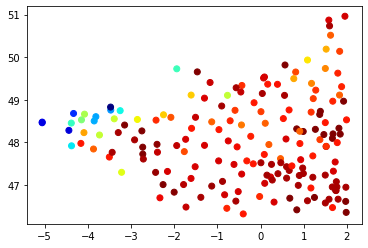

In [22]:
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.show()

### Plot with Cartopy

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Adjust the plot to the area we defined 
#/!\# this line causes a bug of the kaggle notebook and clears all the memory. That is why this line is commented and so
# the plot is not completely adjusted to the data
# Show only the area we defined
#ax.set_extent(extent)

plt.show()